In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

def download_from_drive(link, filename):
  id = link.split("/")[-2]
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" -O {"/content/"+filename} && rm -rf /tmp/cookies.txt

download_from_drive("https://drive.google.com/file/d/1dFu85rrfeDiBabCISrfCPw-Bw1KV7mgr/view?usp=sharing", "top10k_imdb_mod.csv")


def download_from_drive(link, filename):
  id = link.split("/")[-2]
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" -O {"/content/"+filename+".rar"} && rm -rf /tmp/cookies.txt
  !unrar x -Y {"/content/"+filename+".rar"} {"/content/"+filename+"/"}

download_from_drive("https://drive.google.com/file/d/1krZbtFXLW2711hZLq7xO0iXsUTBcwNSQ/view?usp=sharing", "data")

--2023-05-02 13:06:08--  https://docs.google.com/uc?export=download&confirm=&id=1dFu85rrfeDiBabCISrfCPw-Bw1KV7mgr
Resolving docs.google.com (docs.google.com)... 108.177.119.102, 108.177.119.139, 108.177.119.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1b9sqo40dg8d9qmnfj51dkltdumi7gm3/1683032700000/02440328774490686871/*/1dFu85rrfeDiBabCISrfCPw-Bw1KV7mgr?e=download&uuid=a1d6dbc0-a8eb-4a04-a095-e53e81d801a5 [following]
--2023-05-02 13:06:11--  https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1b9sqo40dg8d9qmnfj51dkltdumi7gm3/1683032700000/02440328774490686871/*/1dFu85rrfeDiBabCISrfCPw-Bw1KV7mgr?e=download&uuid=a1d6dbc0-a8eb-4a04-a095-e53e81d801a5
Resolving doc-0c-1k-docs.googleusercontent.com (doc-0c-1k-docs.googleusercontent.com)... 108.177.119.1

In [ ]:
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("./top10k_imdb_mod.csv", encoding="utf-8", lineterminator="\n")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


In [ ]:
def genre_fix(x):
  tags = re.findall(r"\w+\s*\w+",x)
  if len(tags)>0:
    x = tags[0]
  else:
    x = None
  return x

df.genre = df.genre.apply(genre_fix)
df.head()

,Unnamed: 0.1,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,Science Fiction,After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,Action,The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,Action,"Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,Action,A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,Comedy,A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


In [ ]:
filter_df = df[~df.tagline.isna()]
filter_df = filter_df[~filter_df.genre.isna()]
filter_df.head()

,Unnamed: 0.1,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
1,1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,Action,The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,Action,"Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,Action,A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,Comedy,A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
5,5,5,574060,en,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347,Action,In her turbulent life as a professional assass...,344931,114.0,Revenge is best served ice cold.


In [ ]:
len(filter_df)

7072

In [ ]:
filter_df.genre.unique()

array(['Action', 'Comedy', 'Science Fiction', 'Horror', 'Animation',
       'Crime', 'Thriller', 'Family', 'Adventure', 'Western', 'Romance',
       'Drama', 'Fantasy', 'War', 'Documentary', 'Mystery', 'Music',
       'History', 'TV Movie'], dtype=object)

<Axes: xlabel='count', ylabel='genre'>

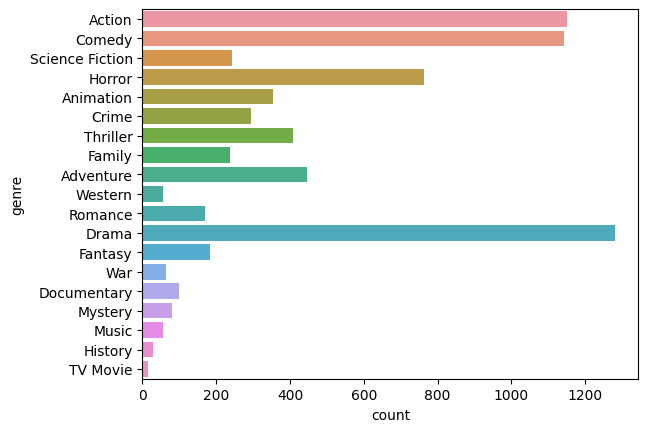

In [ ]:
sns.countplot(y=filter_df.genre)

In [ ]:
filter_df = filter_df[filter_df.genre.isin(["Action", "Comedy", "Horror", "Drama"])]

In [ ]:
catDict = dict(zip(filter_df.genre.unique(),range(len(filter_df.genre.unique()))))

In [ ]:
catDict

{'Action': 0, 'Comedy': 1, 'Horror': 2, 'Drama': 3}

<Axes: xlabel='count', ylabel='genre'>

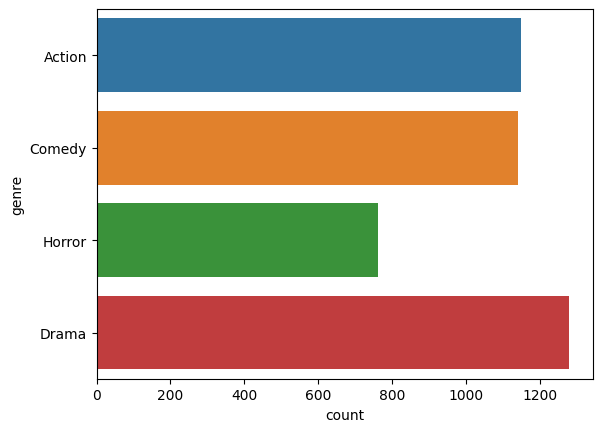

In [ ]:
sns.countplot(y=filter_df.genre)

In [ ]:
filter_df.genre = filter_df.genre.apply(lambda x: catDict[x])

filter_df.head()

,Unnamed: 0.1,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
1,1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,0,The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,0,"Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,0,A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,1,A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
5,5,5,574060,en,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347,0,In her turbulent life as a professional assass...,344931,114.0,Revenge is best served ice cold.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
d_train, d_test = train_test_split(filter_df[["tagline","genre"]],test_size=0.1)

In [ ]:
d_train

,tagline,genre
3652,"When you don't fit in, stand tall",1
8785,Every Killer Meets His Equal.,3
65,Survivors take all.,0
4647,"What if someone you never met, someone you nev...",1
9850,Roscoe Jenkins aims for the heartstrings and f...,1
...,...,...
4386,"To protect, to serve... and make you laugh. Am...",1
2,"Beyond fear, destiny awaits.",0
5561,Somebody said get a life… so they did.,3
4472,Fight Fire with Fire,3


In [ ]:
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def cleaning_text(text):
    stop_words = stopwords.words("english")
    
    # remove stopwords 
    text = text.split()
    text = " ".join([word.lower() for word in text if not word in stop_words])

    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    
    return text
  

In [ ]:
d_train.tagline = d_train.tagline.apply(cleaning_text)
d_test.tagline = d_test.tagline.apply(cleaning_text)
d_train.head()

,tagline,genre
3652,when fit in stand tall,1
8785,every killer meets his equal,3
65,survivors take all,0
4647,what someone never met someone never saw someo...,1
9850,roscoe jenkins aims heartstrings funny bones r...,1


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

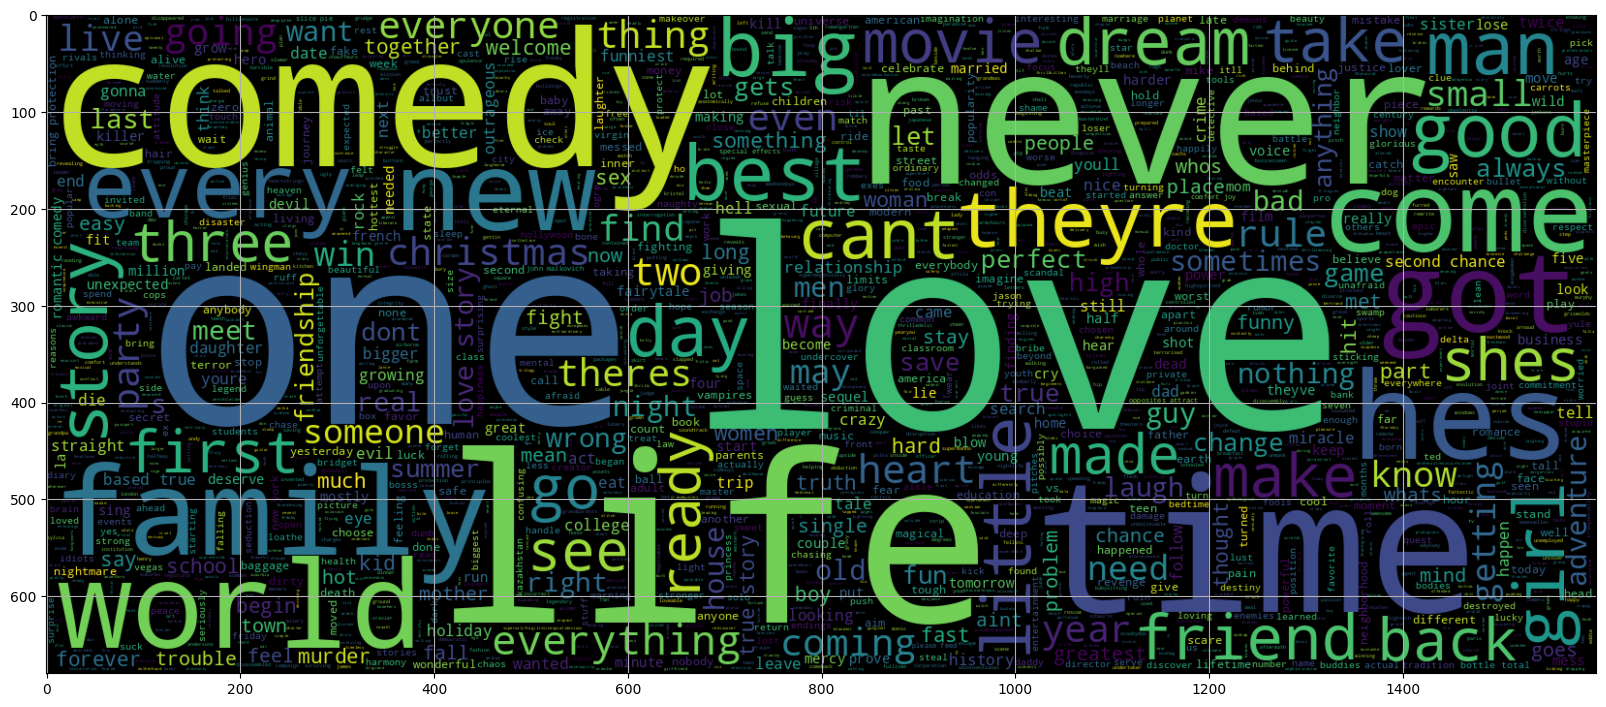

In [ ]:
plt.figure(figsize = (20,20)) 
wordcould = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(d_train.tagline))
plt.imshow(wordcould,interpolation = 'bilinear')
plt.grid(None)

In [ ]:
max_len_words = max(list(d_train.tagline.apply(len)))
print(max_len_words)

154


In [ ]:
from collections import Counter

In [ ]:
#count unique words
def count_unique_words(corpus):
  count = Counter()
  for i in corpus.values:
    for word in i.split():
      count[word]+=1
  return count

text_cnt = count_unique_words(d_train.tagline)

In [ ]:
number_of_unique_words = len(text_cnt)

In [ ]:
number_of_unique_words

4313

In [ ]:
text_cnt

Counter({'when': 62,
         'fit': 5,
         'in': 117,
         'stand': 9,
         'tall': 5,
         'every': 100,
         'killer': 24,
         'meets': 8,
         'his': 50,
         'equal': 6,
         'survivors': 5,
         'take': 56,
         'all': 52,
         'what': 77,
         'someone': 28,
         'never': 147,
         'met': 11,
         'saw': 11,
         'knew': 7,
         'you': 194,
         'roscoe': 1,
         'jenkins': 1,
         'aims': 1,
         'heartstrings': 1,
         'funny': 10,
         'bones': 1,
         'raucous': 1,
         'helping': 1,
         'family': 67,
         'soul': 15,
         'food': 6,
         'everything': 55,
         'decays': 1,
         'no': 121,
         'rule': 10,
         'hope': 21,
         'way': 49,
         'out': 49,
         'witness': 10,
         'defining': 3,
         'chapter': 6,
         'middleearth': 1,
         'saga': 4,
         'life': 136,
         'hold': 8,
         'tryouts':

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, callbacks
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
def tokenizer(x_train, y_train, max_len_word):
    # because the data distribution is imbalanced, "stratify" is used
    X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                      test_size=.2, shuffle=True, 
                                                      stratify=y_train, random_state=0)

    # Tokenizer
    tokenizer = Tokenizer(num_words=number_of_unique_words)
    tokenizer.fit_on_texts(X_train)
    tokenizer_index = tokenizer.word_index
    word_dict = {num : val for (val, num) in tokenizer_index.items()}

    # Sequence data
    train_sequences = tokenizer.texts_to_sequences(X_train)
    train_padded = pad_sequences(train_sequences,
                                 maxlen=max_len_word,
                                 truncating='post',
                                 padding='post')
    
    val_sequences = tokenizer.texts_to_sequences(X_val)
    val_padded = pad_sequences(val_sequences,
                                maxlen=max_len_word,
                                truncating='post',
                                padding='post', )
    
    print(train_padded.shape)
    print(val_padded.shape)
    print('Total words: {}'.format(len(word_dict)))
    return train_padded, val_padded, y_train, y_val, word_dict, tokenizer

X_train, X_val, y_train, y_val, word_dict, tokenizer = tokenizer(d_train.tagline, d_train.genre, max_len_words)

(3121, 154)
(781, 154)
Total words: 3805


In [ ]:
tokenized_unique_words = len(word_dict)

In [ ]:
num_classes = d_train.genre.nunique()
print(num_classes)

4


In [ ]:
model = Sequential()
model.add(layers.Embedding(tokenized_unique_words, 128, input_length=max_len_words))
model.add(layers.LSTM(64, return_sequences=True, name='lstm_layer'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 154, 128)          487040    
                                                                 
 lstm_layer (LSTM)           (None, 154, 64)           49408     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                      

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:

early_stopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                         mode ="min", patience=3)

history = model.fit(X_train, y_train,
                    epochs=50, 
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping], 
                    shuffle=True)


Epoch 1/50
25/25 [==============================] - 9s 288ms/step - loss: 1.3855 - accuracy: 0.2576 - val_loss: 1.3829 - val_accuracy: 0.2855
Epoch 2/50
25/25 [==============================] - 3s 144ms/step - loss: 1.3808 - accuracy: 0.2810 - val_loss: 1.3795 - val_accuracy: 0.2958
Epoch 3/50
25/25 [==============================] - 3s 131ms/step - loss: 1.3770 - accuracy: 0.2916 - val_loss: 1.3762 - val_accuracy: 0.2894
Epoch 4/50
25/25 [==============================] - 2s 95ms/step - loss: 1.3728 - accuracy: 0.2897 - val_loss: 1.3734 - val_accuracy: 0.2894
Epoch 5/50
25/25 [==============================] - 4s 160ms/step - loss: 1.3698 - accuracy: 0.2948 - val_loss: 1.3712 - val_accuracy: 0.2894
Epoch 6/50
25/25 [==============================] - 2s 100ms/step - loss: 1.3669 - accuracy: 0.2951 - val_loss: 1.3693 - val_accuracy: 0.2894
Epoch 7/50
25/25 [==============================] - 1s 44ms/step - loss: 1.3636 - accuracy: 0.2977 - val_loss: 1.3677 - val_accuracy: 0.2894
Epoch 8/

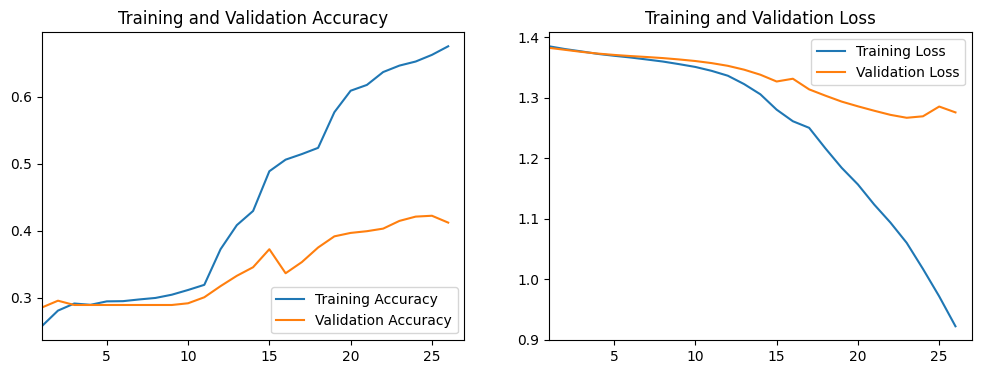

In [ ]:
# Plotting accuracy and val_accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_acc)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_sequences = tokenizer.texts_to_sequences(d_test.tagline)
test_padded = pad_sequences(test_sequences,
                            maxlen=max_len_words,
                            truncating='post',
                            padding='post', )

In [ ]:
model.evaluate(test_padded,d_test.genre)

14/14 [==============================] - 0s 10ms/step - loss: 1.2968 - accuracy: 0.4078


[1.2968260049819946, 0.40783411264419556]

In [ ]:
!git clone https://github.com/plasticityai/magnitude.git
%cd ./magnitude/
!python setup.py install -vvvv
%cd ../
!pip install -U lz4==1.0.0 xxhash==2.0.2 fasteners==0.17.1 annoy==1.17.1
!python -m spacy download en_core_web_sm

A streamkimeneten csak az utolsó 5000 sor látható.
SyntaxError: unterminated string literal (detected at line 36)

byte-compiling /usr/local/lib/python3.10/dist-packages/pymagnitude/third_party/allennlp/tests/notebooks_test.py to notebooks_test.cpython-310.pyc
  File "/usr/local/lib/python3.10/dist-packages/pymagnitude/third_party/allennlp/tests/notebooks_test.py", line 11
    print u"jupyter must be installed in order to run notebook tests. "
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)?

byte-compiling /usr/local/lib/python3.10/dist-packages/pymagnitude/third_party/allennlp/semparse/worlds/world.py to world.cpython-310.pyc
  File "/usr/local/lib/python3.10/dist-packages/pymagnitude/third_party/allennlp/semparse/worlds/world.py", line 115
    return set([**self.global_name_mapping, **self.local_name_mapping])
                ^^
SyntaxError: invalid syntax

byte-compiling /usr/local/

In [ ]:
from pymagnitude import *

In [ ]:
vectors = Magnitude("./data/03Emoji/cc.en.50.magnitude")

In [ ]:
len(list(word_dict.values()))

3805

In [ ]:
word_dict.values()

dict_values(['the', 'a', 'one', 'love', 'you', 'never', 'it', 'story', 'life', 'in', 'time', 'no', 'world', 'every', 'get', 'man', 'they', 'its', 'new', 'back', 'this', 'hes', 'he', 'what', 'true', 'for', 'when', 'ever', 'evil', 'family', 'cant', 'first', 'like', 'there', 'take', 'some', 'all', 'is', 'see', 'fight', 'two', 'theyre', 'go', 'be', 'to', 'out', 'she', 'die', 'day', 'way', 'an', 'death', 'his', 'kill', 'fear', 'truth', 'best', 'nothing', 'comes', 'make', 'everything', 'coming', 'got', 'if', 'home', 'hell', 'come', 'know', 'good', 'how', 'dont', 'lives', 'terror', 'hero', 'us', 'begins', 'comedy', 'greatest', 'made', 'save', 'up', 'would', 'now', 'her', 'your', 'theres', 'we', 'last', 'just', 'not', 'and', 'thing', 'everyone', 'game', 'again', 'war', 'even', 'little', 'big', 'real', 'second', 'night', 'power', 'change', 'based', 'their', 'someone', 'future', 'find', 'sometimes', 'live', 'dream', 'will', 'people', 'years', 'on', 'rules', 'bad', 'dead', 'secret', 'crime', 'adv

In [ ]:
preload_embedding = vectors.query(list(word_dict.values()))
preload_embedding.shape

(3805, 50)

In [ ]:
preloaded_model = Sequential()
preloaded_model.add(layers.Embedding(tokenized_unique_words, 50, input_length=max_len_words, weights=[preload_embedding]))
preloaded_model.add(layers.LSTM(64, return_sequences=True, name='lstm_layer'))
preloaded_model.add(layers.GlobalMaxPool1D())
preloaded_model.add(layers.Dense(64, activation='relu'))
preloaded_model.add(layers.Dropout(0.2))
preloaded_model.add(layers.Dense(4, activation='softmax'))

In [ ]:
preloaded_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
preloaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 154, 50)           190250    
                                                                 
 lstm_layer (LSTM)           (None, 154, 64)           29440     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                      

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                         mode ="min", patience=3)

history = preloaded_model.fit(X_train, y_train,
                    epochs=50, 
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping], 
                    shuffle=True)

Epoch 1/50
25/25 [==============================] - 9s 274ms/step - loss: 1.3818 - accuracy: 0.2804 - val_loss: 1.3782 - val_accuracy: 0.2778
Epoch 2/50
25/25 [==============================] - 4s 156ms/step - loss: 1.3767 - accuracy: 0.2877 - val_loss: 1.3747 - val_accuracy: 0.2855
Epoch 3/50
25/25 [==============================] - 2s 78ms/step - loss: 1.3740 - accuracy: 0.2826 - val_loss: 1.3726 - val_accuracy: 0.2881
Epoch 4/50
25/25 [==============================] - 2s 70ms/step - loss: 1.3717 - accuracy: 0.2900 - val_loss: 1.3714 - val_accuracy: 0.2868
Epoch 5/50
25/25 [==============================] - 2s 77ms/step - loss: 1.3697 - accuracy: 0.2980 - val_loss: 1.3706 - val_accuracy: 0.2894
Epoch 6/50
25/25 [==============================] - 2s 94ms/step - loss: 1.3688 - accuracy: 0.2967 - val_loss: 1.3700 - val_accuracy: 0.2907
Epoch 7/50
25/25 [==============================] - 2s 55ms/step - loss: 1.3699 - accuracy: 0.2900 - val_loss: 1.3696 - val_accuracy: 0.2907
Epoch 8/50


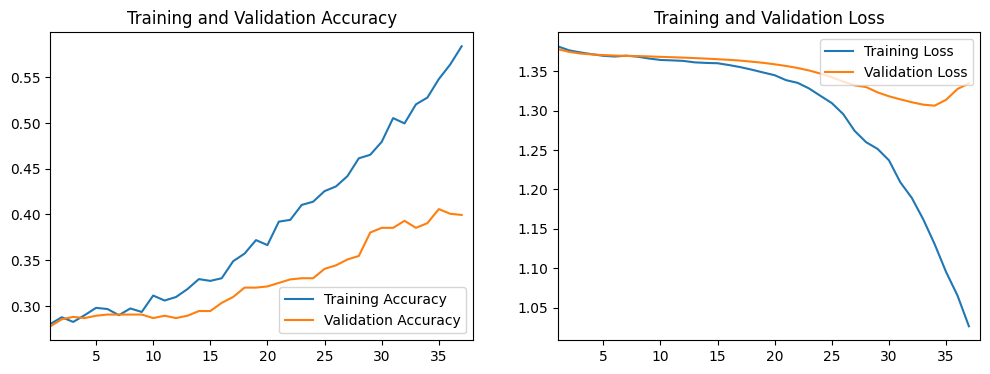

In [ ]:
# Plotting accuracy and val_accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_acc)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
preloaded_model.evaluate(test_padded, d_test.genre)

14/14 [==============================] - 0s 9ms/step - loss: 1.3603 - accuracy: 0.3894


[1.360348105430603, 0.3894009292125702]